# Week 5: 训练集的划分 与 多项式回归模型

在Week5的学习里, 我们主要熟悉两个概念:

1. 对于一个数据集, 我们怎么做测试, 怎么去训练他
2. 如何使用多项式回归模型

注意了! 我们的要求还是: 掌握概念和思路, 不用在具体实现上浪费太多精力.

## 机器学习

其实我们现在所学习到的所有例子, 和真正的机器学习还差很远.

但是我们一旦掌握了基础的思路和概念, 我们就知道了学习的方向在哪里, 这样的话遇到了具体的实现问题, 我们就方便对症下药!
查看文档的效率也会大大提高.

在这个note里, 我们首先以文字的形式重温老师的内容, 然后再补充一些大家可能会在写作业的过程中用到的一些概念.

### 机器学习的最简要流程是什么??

机器学习简单流程：

1. 使用大量和任务相关的数据集来训练模型；
2. 通根据误差不断重复, 调整训练模型的参数和方法；
3. 从逻辑上确认模型的适用性, 评估模型
3. 应用!

总而言之, 我们希望模型在真实数据上预测的结果误差越小越好!

### 怎么减少误差呢??

我们想减少误差, 最直观的就是我们把模型用到真实数据上去.

但是如果误差一下就很小?
那还是正常生活吗!?

通常情况下没有那么幸运，误差可能很大，这个时候你肯定会重新训练模型，可能需要往复很多次, 这种方式虽然能够更好的指导我们的模型，但是成本和效率非常的差! 也就是说这个方法经济性很差...

如果我们往后退几步: 我们就从训练数据集上看, 我们可以使用模型在数据集本身的训练的拟合程度

但是呢!
往往我们获取的数据集并不是完全代表性地
通常我们获取到的数据集可能很少、数据的代表性不够、包含太多的无效数据，
那么模型对训练数据集的拟合程度就有一些"toy model"的感觉了
你甚至可以将模型在数据集上的误差减小到0

但是因为对模型训练时候的数据集往往不干净
所以这样的模型也不一定很有效..

### 训练集与测试集

一个方式就是将数据分割成两部分
训练集和测试集

我们可以使用训练集的数据来训练模型，然后用测试集上的误差作为最终模型的误差

有了测试集，我们想要验证模型的最终效果，只需将训练好的模型在测试集上计算误差，即可认为此误差即为真实情况下的的近似
我们只需让我们训练好的模型在测试集上的误差最小即可!

还记得老师上课画的红色长方形么!! 就是你的信用卡使用信息的那个例子!

### 如何划分数据集为训练集和测试集??

我们一点一点的探索一个简单一点的例子

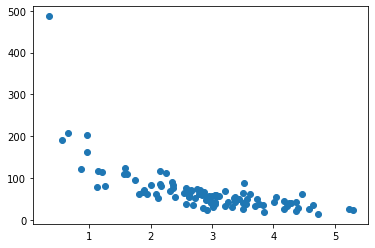

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# 搞一点随机数, 这个你不用知道.
data_1 = numpy.random.seed(2)
x = numpy.random.normal(3, 1, 100)
y = (numpy.random.normal(150, 40, 100) / x)

xreshaped = x.reshape(-1, 1)
yreshaped = y.reshape(-1, 1)

data = np.hstack((xreshaped,yreshaped))

plt.scatter(x, y)
plt.show() 

在上面的这个代码里, 我创建了一些有趋势的随机数, 关于这个随机数的生成, 大家不用关心太多.

我们假设上面的数据集是关于 客户进店之后花了x分钟的时间, 购买了y价格的产品.
也就是说
x轴上的数据 = 在店里呆了多少分钟
y轴上的数据 = 购买的产品的价格

In [38]:
from sklearn.model_selection import train_test_split
#data:需要进行分割的数据集
#random_state:设置随机种子，保证每次运行生成相同的随机数
#test_size:将数据分割成训练集的比例
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [21]:
print(test_set)

[[4.24821292e+00 4.01521374e+01]
 [2.92552924e+00 2.29755043e+01]
 [2.34674973e+00 9.00268187e+01]
 [2.66432266e+00 7.08752193e+01]
 [4.46767801e+00 6.29386933e+01]
 [3.54235257e+00 4.37732168e+01]
 [3.25657045e+00 4.20862374e+01]
 [2.81053074e+00 7.23787305e+01]
 [3.55145404e+00 3.85751901e+01]
 [2.58324215e+00 7.60520493e+01]
 [2.25212905e+00 1.11901904e+02]
 [2.73094304e+00 5.32501579e+01]
 [3.06648901e+00 5.90131844e+01]
 [3.11272650e+00 5.57924574e+01]
 [3.38186623e+00 5.57181345e+01]
 [1.20656441e+00 1.14238859e+02]
 [3.40550544e-01 4.87037268e+02]
 [2.90854738e+00 4.72453375e+01]
 [3.04153939e+00 3.74514818e+01]
 [5.23136679e+00 2.48640628e+01]]


现在就完成了本节课的第一个知识点! 数据集的划分

我们总结起来, 有三个需要注意的:
1. 我们需要知道那个数据集
2. 调用正确的package
3. 使用函数划分

## 多项式拟合

我不太清楚老师为啥讲这个拟合

但是我在学习这些理论的时候, 老师说过, 多项式拟合是你最不应该使用的
但无论如何, 让我们来简单看一下

In [39]:
print(train_set[:,0])

[4.27837923 2.53799465 2.36234499 1.13190935 3.73527958 2.4038403
 2.6864918  3.38047197 2.09099239 2.61848352 5.29220801 3.04797059
 1.61548133 1.57878277 4.40669624 2.15825263 2.32232442 3.04625552
 4.35963386 2.9808695  3.08771022 3.37044454 1.75471191 4.04082395
 1.81238771 3.00902525 2.92278133 2.76381597 2.96042976 1.88207455
 2.66117803 4.64027081 4.17500122 3.00000976 1.94204778 3.69511961
 3.50288142 0.95967695 3.50185721 3.35088849 2.36532069 0.65639681
 3.43349633 4.73118467 4.00036589 1.56056097 3.61134078 3.52429643
 2.8676711  2.78286473 0.96653345 3.77101174 3.21611601 2.17086471
 4.1735315  3.50839624 4.58448706 0.56523242 1.2620405  1.14138761
 3.32600343 2.59610773 2.1557863  2.8465048  2.94373317 2.62433058
 2.84356583 0.8638039  2.01122095 4.21788563 3.56627544 1.90126105
 4.36723542 3.82470301 2.12189211 2.58068352 3.84245628 3.53905832
 3.20420798 2.61890748]


In [42]:
print(train_set[:,1])

[ 39.01941998  64.76189111  76.22874513  77.86225629  48.95077634
  53.79918302  34.70979433  46.50723143  60.57574247  62.86162946
  24.10914678  43.58292288 108.46604975 123.11113005  27.61777936
 117.41526024  68.74904453  59.1743156   43.76381026  40.94657678
  57.61442568  42.32964984  95.52998052  54.98360439  60.83111238
  30.26663537  55.46264153  72.54627253  44.34023444  67.13926856
  68.37843898  36.05903817  27.02857247  56.63901768  62.4237197
  34.16662793  63.77986643 161.50533328  25.90093643  52.19177448
  82.32095959 208.47130994  50.79538368  14.09666443  43.5111781
 108.8692008   61.39097018  89.19445659  65.39332448  61.85229524
 202.76589695  37.10649687  68.30365792  81.92492065  45.84155234
  39.62788318  25.07604874 190.30762228  80.14230427 115.73628743
  30.00934597  70.55883508  85.28325651  27.89501382  56.20180641
  53.67848811  58.83311239 121.17874037  83.01076429  32.35727584
  50.5667094   71.22685026  21.035144    34.46826737  51.4368334
  38.66530343

In [40]:
print(train_set[0,:])

[ 4.27837923 39.01941998]


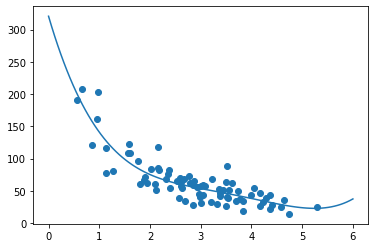

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# 搞一点随机数, 这个你不用知道.
data_1 = numpy.random.seed(2)
x = numpy.random.normal(3, 1, 100)
y = (numpy.random.normal(150, 40, 100) / x)

xreshaped = x.reshape(-1, 1)
yreshaped = y.reshape(-1, 1)

data = np.hstack((xreshaped,yreshaped))
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

mymodel = numpy.poly1d(numpy.polyfit(train_set[:,0], train_set[:,1], 4))

myline = numpy.linspace(0, 6, 100)

plt.scatter(train_set[:,0], train_set[:,1])
plt.plot(myline, mymodel(myline))
plt.show() 

In [48]:
import numpy
from sklearn.metrics import r2_score
r2 = r2_score(train_set[:,1], mymodel(train_set[:,0]))

print(r2) 

0.7881221165549795


In [50]:
mymodel = numpy.poly1d(numpy.polyfit(train_set[:,0], train_set[:,1], 4))

r2 = r2_score(test_set[:,1], mymodel(test_set[:,0]))

print(r2) 

0.642906690628704


In [51]:
print(mymodel(5)) 

23.719971982434174
